In [24]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [25]:
#importing housing dataset
data = pd.read_csv('housing.csv')

In [26]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [27]:
#number of rows and columns of dataset
data.shape

(20640, 10)

In [28]:
#statistical measures of dataset
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [29]:
#checking for missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [30]:
#dropping the non null values
data.dropna(inplace=True)

In [31]:
#extracting information on data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

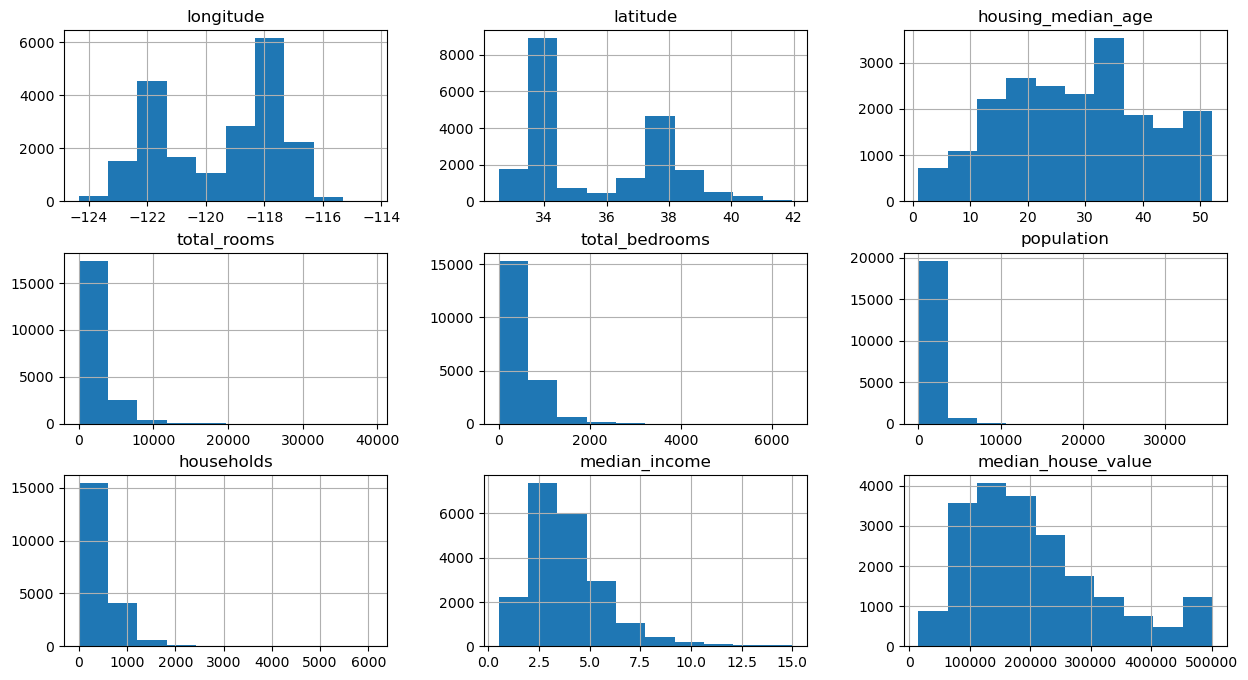

In [32]:
data.hist(figsize=(15,8))

In [33]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [34]:
data = data.join(pd.get_dummies(data.ocean_proximity , dtype=int)).drop(['ocean_proximity'] , axis= 1)

In [35]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


<Axes: >

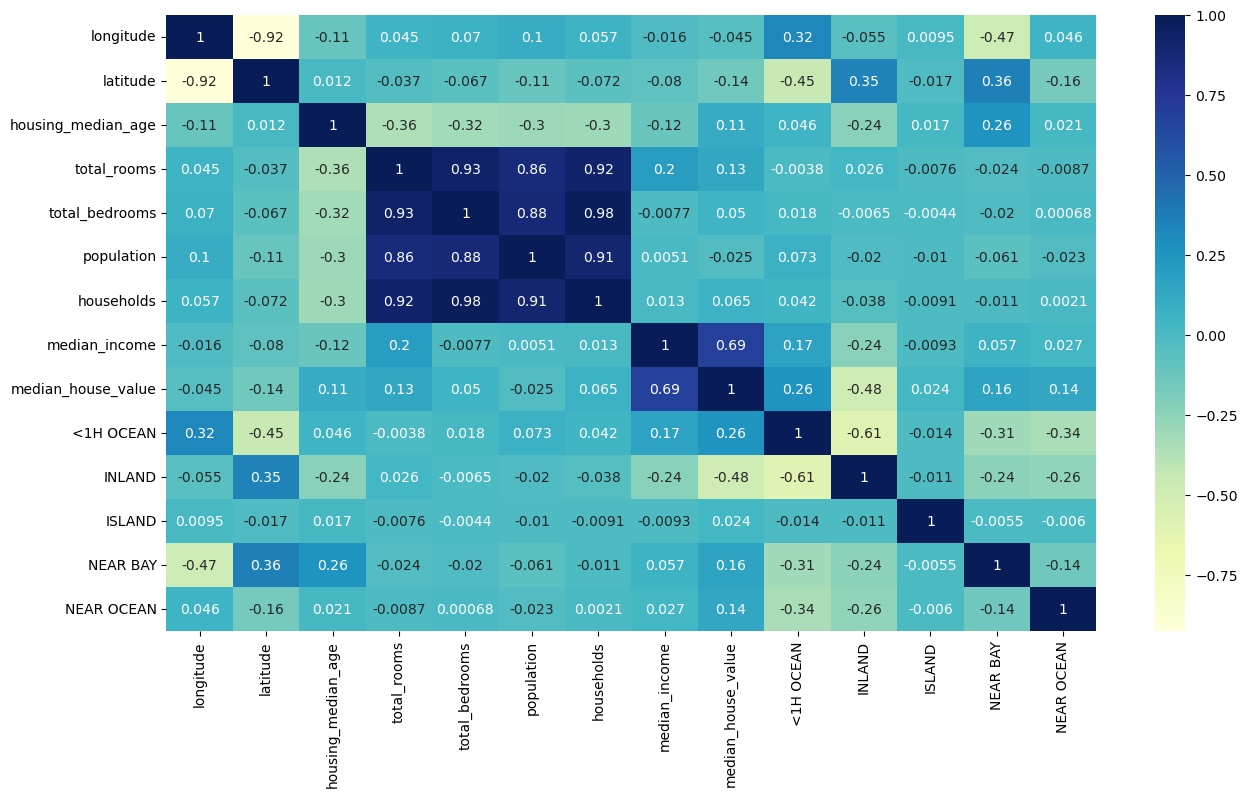

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True , cmap = 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

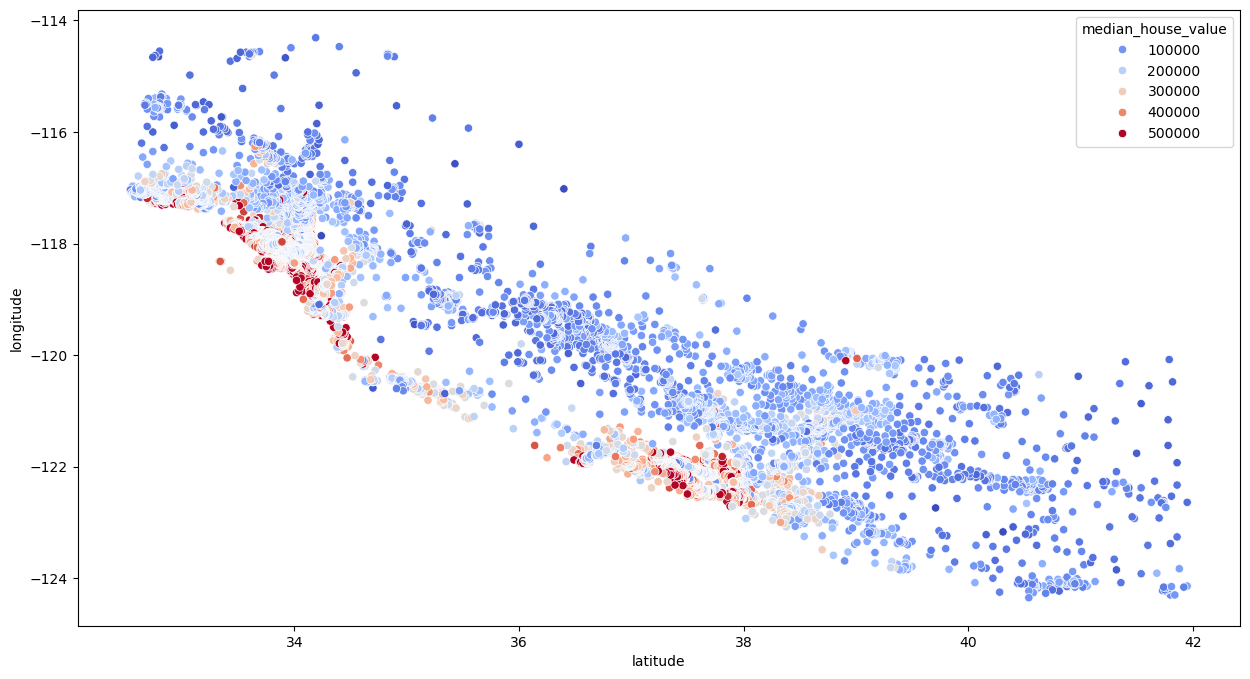

In [37]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'latitude' , y = 'longitude' , hue = 'median_house_value' , palette= 'coolwarm' , data= data)

In [38]:
X = data.drop(['median_house_value'] , axis= 1)
y = data['median_house_value']

In [39]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size= 0.2)
X.shape , X_train.shape , X_test.shape

((20433, 13), (16346, 13), (4087, 13))

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print(X_train)

[[ 1.2364563  -1.19326092 -1.88024973 ... -0.01354861 -0.35331001
  -0.38593024]
 [ 1.24644304 -1.35714866 -0.21131411 ... -0.01354861 -0.35331001
   2.59114184]
 [ 0.91688053 -0.75310528 -0.13184098 ... -0.01354861 -0.35331001
  -0.38593024]
 ...
 [-1.30017631  1.92528862  0.10657839 ... -0.01354861 -0.35331001
  -0.38593024]
 [ 0.5923114  -0.8327079  -0.37026036 ... -0.01354861 -0.35331001
  -0.38593024]
 [ 1.26142315 -1.17453089 -0.52920661 ... -0.01354861 -0.35331001
  -0.38593024]]


In [41]:
X_test = scaler.transform(X_test)
print(X_test)

[[ 1.21148944 -0.37850473  0.10657839 ... -0.01354861 -0.35331001
  -0.38593024]
 [ 0.71215231 -0.72032773  0.82183652 ... -0.01354861 -0.35331001
  -0.38593024]
 [ 1.11661538 -0.78588283 -1.08551848 ... -0.01354861 -0.35331001
  -0.38593024]
 ...
 [-0.85576626  1.15267499 -1.16499161 ... -0.01354861 -0.35331001
  -0.38593024]
 [ 0.91688053 -0.99659563  0.02710527 ... -0.01354861 -0.35331001
  -0.38593024]
 [-1.34012328  1.27442017 -0.29078723 ... -0.01354861 -0.35331001
  -0.38593024]]


In [42]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train , y_train)

RandomForestRegressor()

In [43]:
reg.score(X_test , y_test)

0.8287805931163552

In [44]:
training_data_pred = reg.predict(X_train)
print(training_data_pred)

[296783.   118251.   131840.   ...  66006.   385535.02 180669.  ]


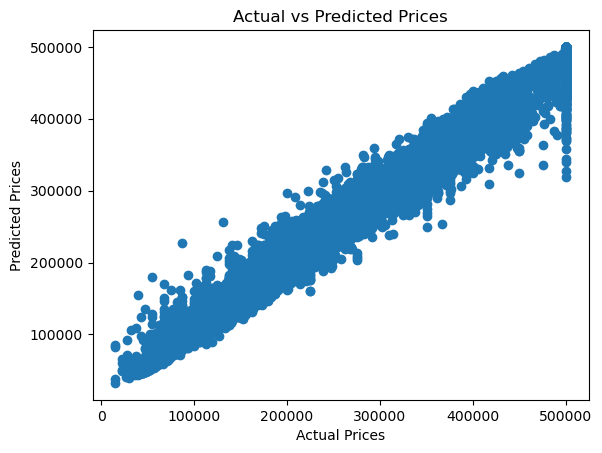

In [45]:
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [46]:
test_data_pred = reg.predict(X_test)
print(test_data_pred)

[ 92015.   238877.   147576.   ... 136097.   430321.4  281132.01]
